<a href="https://colab.research.google.com/github/amansingh202/Machine-Learning/blob/main/Deep_Learning/lec06_in_class_ex2_ag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import math
class ag: # AutoGrad
#auto differentiation


    def log(input):
        output = ag.Scalar(math.log(input.value), inputs=[input], op="log")

        def _backward():
            input.grad += output.grad / input.value
            return None

        output._backward = _backward
        return output

    def exp(input):

        output = ag.Scalar(math.exp(input.value), inputs=[input], op="exp")

        def _backward():
            ## EXERCISE 2.B
            ## YOUR CODE HERE
            return None

        output._backward = _backward
        return output

    def relu(input):
        output = ag.Scalar(max(0, input.value), inputs=[input], op="relu")

        def _backward():
            ## EXERCISE 2.C
            ## YOUR CODE HERE
            return None

        output._backward = _backward
        return output

    class Scalar: # Scalars with grads
        def __init__(self,  value, op="", _backward= lambda : None, inputs=[], label=""):

            self.value = float(value)
            self.grad = 0.0

            self._backward = _backward
            self.inputs = inputs

            self.op = op
            self.label = label


        def topological_sort(self):
            ## EXERCISE 2.A
            ## YOUR CODE HERE
            visited = set()  # Keep track of visited nodes
            sorted_nodes = []  # Result list for topological order

            def dfs(node):
                if node in visited:  # If already visited, return
                    return
                visited.add(node)  # Mark the node as visited
                for input_node in node.inputs:  # Visit all inputs (dependencies)
                    dfs(input_node)  # Recursive DFS call
                sorted_nodes.append(node)  # Add the node to the sorted list

            dfs(self)  # Start DFS from the current node
            return sorted_nodes

        def backward(self):
            self.grad = 1.0

            topo_order = self.topological_sort()

            for node in reversed(topo_order):
                node._backward()


        def __add__(self, other):
            assert isinstance(other, ag.Scalar)

            output = ag.Scalar(self.value + other.value,
                               inputs=[self, other], op="add")

            def _backward():
                self.grad += output.grad
                other.grad += output.grad

            output._backward = _backward
            return output


        def __mul__(self, other):
            assert isinstance(other, ag.Scalar)
            output = ag.Scalar(self.value * other.value, inputs=[self, other], op="mul")

            def _backward():
                ## EXERCISE 2.B

                self.grad += other.value * output.grad  # YOUR CODE HERE
                other.grad += self.value * output.grad  # YOUR CODE HERE

                return self.grad

            output._backward = _backward #

            return output

        def __pow__(self, exponent): # exponent is just a python float
            output = ag.Scalar(self.value ** exponent, inputs=[self], op=f"pow({exponent})")

            def _backward():
                ## EXERCISE 2.B

                self.grad += exponent * (self.value ** (exponent - 1)) * output.grad # YOUR CODE HERE
                return self.grad

            output._backward = _backward
            return output

        def __repr__(self) -> str:
            if self.op == "":
                return self.label
            else:
                return self.label + "    " + self.op



In [24]:
x = ag.Scalar(2, label="z2:x")
y = ag.Scalar(3, label="z3:y")

# implement log(x^2+1)*exp(y) + y^2*x
def f(x,y):
    z1 = ag.Scalar(1,label= "z1:1")
    z2 = x
    z3 = y

    z4 = z2**2
    z4.label = "z4:x^2"

    z5 = z4 + z1
    z5.label = "z5:x^2 + 1"

    z6 = ag.log(z5)
    z6.label = "z6:log(x^2 + 1)"

    z7 = ag.exp(z3)
    z7.label = "z7:exp(y)"

    z8 = z6 * z7
    z8.label = "z8:log(x^2 + 1) * exp(y)"

    z9 = z3**2
    z9.label = "z9:y^2"

    z10 = z9 * z2
    z10.label = "z10:y^2 * x"

    z11 = z8 + z10
    z11.label = "z11:log(x^2 + 1) * exp(y) + y^2 * x"

    return z11

## Exercise 2.A --- run this after you're done

In [25]:
output = f(x,y)

output.topological_sort()

[z2:x,
 z4:x^2    pow(2),
 z1:1,
 z5:x^2 + 1    add,
 z6:log(x^2 + 1)    log,
 z3:y,
 z7:exp(y)    exp,
 z8:log(x^2 + 1) * exp(y)    mul,
 z9:y^2    pow(2),
 z10:y^2 * x    mul,
 z11:log(x^2 + 1) * exp(y) + y^2 * x    add]

# Exercise 2.B --- run this after you're done

In [26]:
output = f(x,y)
output.backward()
print("f(x,y)", output.value)
print("x.grad", x.grad)
print("y.grad", y.grad)

f(x,y) 50.3264246157732
x.grad 25.068429538550134
y.grad 12.0


# Check against actual mathematics

In [ ]:
print("f(x,y)", math.log(x.value**2 + 1) * math.exp(y.value) + y.value**2 * x.value)
print("x.grad", (2*x.value)/(x.value**2 + 1) * math.exp(y.value) + y.value**2)
print("y.grad", math.log(x.value**2 + 1) * math.exp(y.value) + 2*y.value * x.value)

f(x,y) 50.3264246157732
x.grad 25.068429538550134
y.grad 44.3264246157732


# Exercise 2.C --- run this after you're done

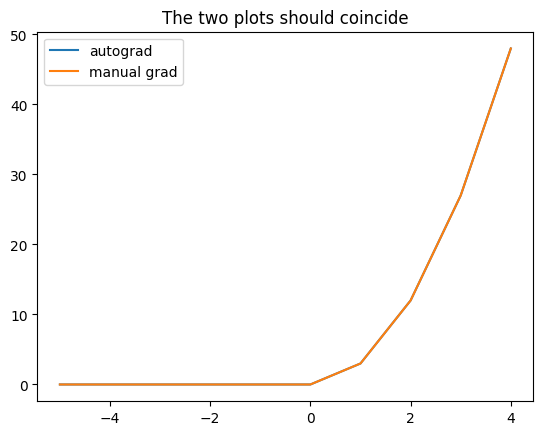

In [ ]:
import matplotlib.pyplot as plt
xs_raw = [i - 5 for i in range(10)]
xs = [ag.Scalar(i) for i in xs_raw]
ys = [ag.relu(x)**3 for x in xs]
[y.backward() for y in ys]
grads = [x.grad for x in xs]
plt.plot(xs_raw, grads, label='autograd')
plt.plot(xs_raw, [3*max(0,x_raw)**2 for x_raw in xs_raw], label='manual grad')
plt.title("The two plots should coincide")
plt.legend()
plt.show()